# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [2]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [3]:
# Your code to explore the data
#1.Clean Data
df_flights[df_flights.isnull().any(axis=1)][['DepDelay', 'DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [4]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

# Statistics of DepDelay and ArrDelay

Minimum: -63.00
Mean: 10.35
Median: -1.00
Mode: -3.00
Maximum: 1425.00

Minimum: -75.00
Mean: 6.50
Median: -3.00
Mode: 0.00
Maximum: 1440.00



C:\Users\Baljo\AppData\Local\Temp\ipykernel_20244\1062817051.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Baljo\AppData\Local\Temp\ipykernel_20244\1062817051.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


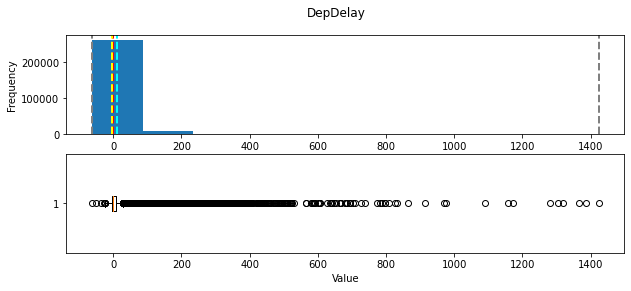

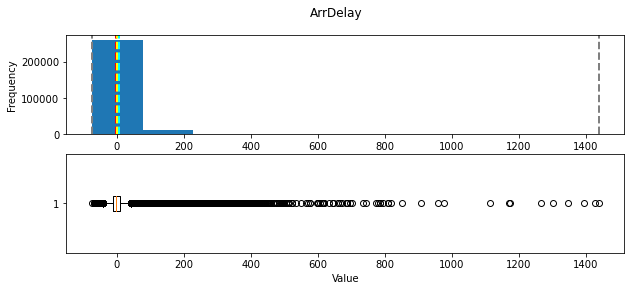

In [5]:
def show_stats(data):
    from matplotlib import pyplot as plt
    min_val = data.min()
    max_val = data.max()
    mean_val = data.mean()
    med_val = data.median()
    mod_val  = data.mode()[0]
    
    print("Minimum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\nMaximum: {:.2f}\n".format(min_val,
                                                                                                    mean_val,
                                                                                                    med_val,
                                                                                                    mod_val,
                                                                                                    max_val))

    fig, ax = plt.subplots(2, 1, figsize=(10,4))
    ax[0].hist(data)
    ax[0].set_ylabel("Frequency")

    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mod_val, color='yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)

    ax[1].boxplot(data, vert=False)
    ax[1].set_xlabel('Value')
    fig.suptitle(data.name)
    fig.show()


field = ['DepDelay','ArrDelay']
for col in field:
    show_stats(df_flights[col])

# Clearing Outliers in DepDelay and ArrDelay

Minimum: -11.00
Mean: -0.92
Median: -2.00
Mode: -3.00
Maximum: 16.00

Minimum: -32.00
Mean: -5.03
Median: -6.00
Mode: 0.00
Maximum: 37.00



C:\Users\Baljo\AppData\Local\Temp\ipykernel_20244\1062817051.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Baljo\AppData\Local\Temp\ipykernel_20244\1062817051.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


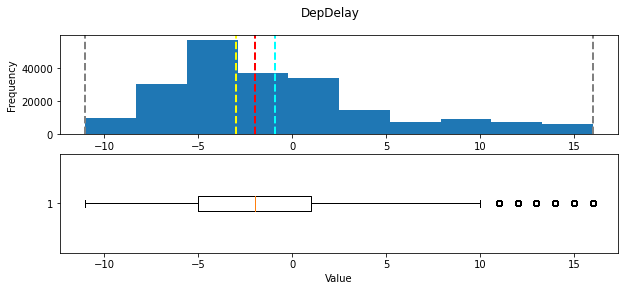

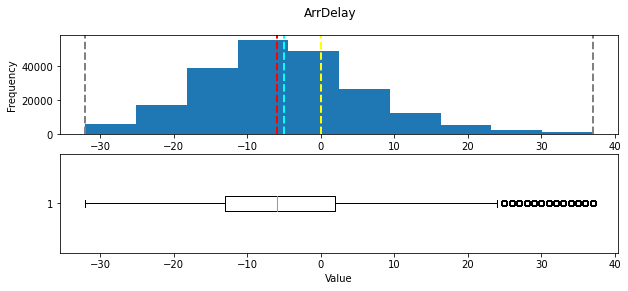

In [6]:
ArrDelayq01 = df_flights.ArrDelay.quantile(.01)
ArrDelayq90 = df_flights.ArrDelay.quantile(.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelayq90]
df_flights = df_flights[df_flights.ArrDelay > ArrDelayq01]

DepDelayq01 = df_flights.DepDelay.quantile(.01)
DepDelayq90 = df_flights.DepDelay.quantile(.90)
df_flights = df_flights[df_flights.DepDelay < DepDelayq90]
df_flights = df_flights[df_flights.DepDelay > DepDelayq01]

for col in field:
    show_stats(df_flights[col])

### Mean of Departure and Arrival Delay

In [7]:
df_flights.describe()
#Mean
print('Mean of DepDelay: {:.2f}\nMean of ArrDelay: {:.2f}\n'.format(df_flights.DepDelay.mean(), df_flights.ArrDelay.mean()))

Mean of DepDelay: -0.92
Mean of ArrDelay: -5.03



### Carrier Performance

C:\Users\Baljo\AppData\Local\Temp\ipykernel_20244\12332509.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_flights.groupby(df_flights.Carrier)['DepDelay','ArrDelay'].mean())


         DepDelay  ArrDelay
Carrier                    
9E      -2.852246 -7.496322
AA      -0.850789 -5.879219
AS      -3.078139 -3.583845
B6      -2.357754 -5.810046
DL      -1.575584 -6.611133
EV      -2.312638 -6.813485
F9      -0.512635 -0.502527
FL      -0.385143 -3.954649
HA      -2.960716 -2.285384
MQ      -1.730151 -4.303297
OO      -2.525729 -4.289238
UA      -0.338885 -7.606653
US      -2.424986 -3.911790
VX      -0.926741 -5.303501
WN       1.892396 -2.884136
YV      -2.440316 -3.818073


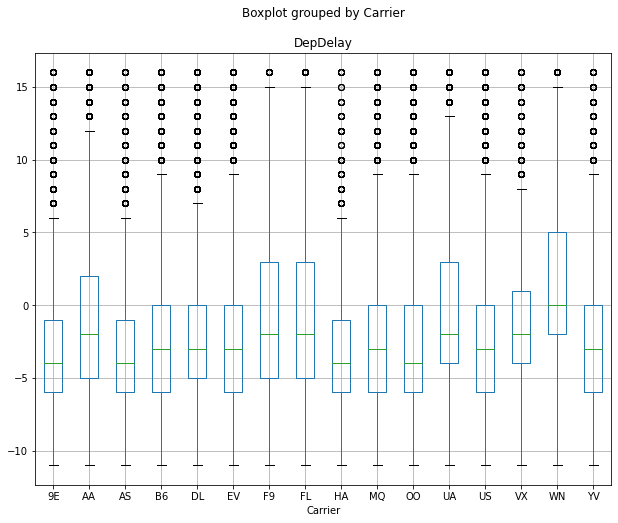

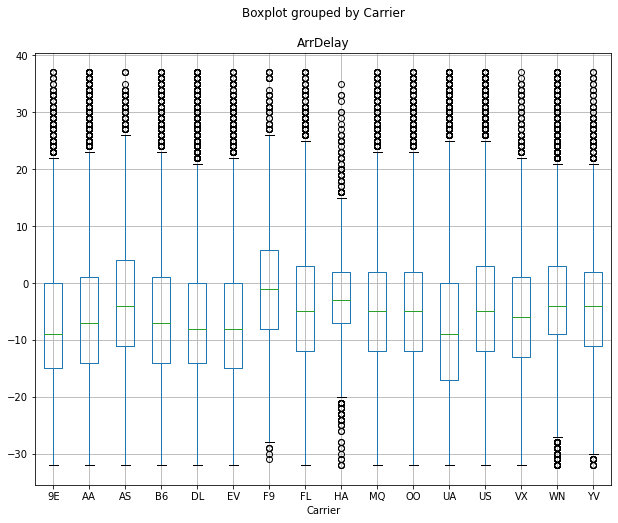

In [8]:
print(df_flights.groupby(df_flights.Carrier)['DepDelay','ArrDelay'].mean())
for col in field:
    df_flights.boxplot(column=col, by="Carrier", figsize=(10,8))

### Difference in Days of the week

C:\Users\Baljo\AppData\Local\Temp\ipykernel_20244\1347591794.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_flights.groupby(df_flights.DayOfWeek)['DepDelay','ArrDelay'].mean())


           DepDelay  ArrDelay
DayOfWeek                    
1         -0.839550 -4.918798
2         -1.227523 -5.571680
3         -1.124567 -4.750124
4         -0.539928 -3.954965
5         -0.609149 -4.448380
6         -1.162744 -6.244790
7         -0.962510 -5.509348


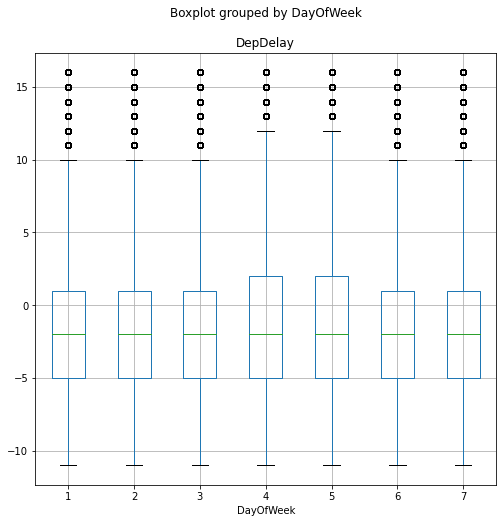

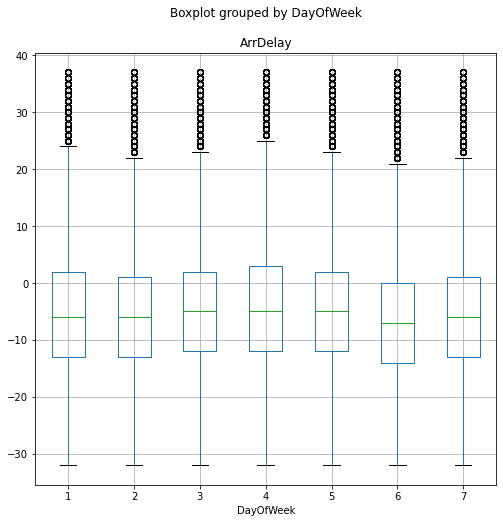

In [28]:
print(df_flights.groupby(df_flights.DayOfWeek)['DepDelay','ArrDelay'].mean())
for col in field:
    df_flights.boxplot(column=col, by='DayOfWeek',figsize=(8,8))

### Airports with the Highest Average of Delays

In [51]:
airport_flights = df_flights.groupby(df_flights.OriginAirportName)
sorted_airport_flights = airport_flights.DepDelay.mean()
sorted_airport_flights = pd.DataFrame(sorted_airport_flights).sort_values('DepDelay', ascending=False)
sorted_airport_flights

,DepDelay
OriginAirportName,
Chicago Midway International,2.365960
Dallas Love Field,2.148798
William P Hobby,1.561927
Metropolitan Oakland International,0.964853
Denver International,0.807272
...,...
Memphis International,-2.962737
Tucson International,-2.989154
Ted Stevens Anchorage International,-3.149758


### Arival Time Based on Delay Time

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

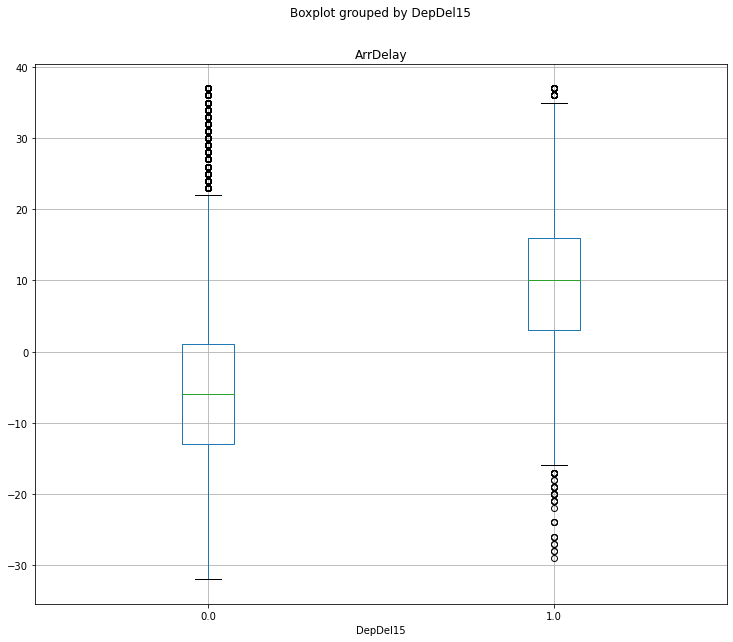

In [52]:
df_flights.boxplot(column="ArrDelay", by="DepDel15", figsize=(12,10))

### Route With the Most Late Arrivals

In [59]:
destination_route = pd.Series(df_flights['OriginAirportName'] + " -> " + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, destination_route.rename("Route")], axis = 1)
route = df_flights.groupby(df_flights.Route)
pd.DataFrame(route['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)
 

,ArrDel15
Route,
San Francisco International -> Los Angeles International,90
Los Angeles International -> San Francisco International,69
LaGuardia -> Hartsfield-Jackson Atlanta International,68
Los Angeles International -> John F. Kennedy International,52
LaGuardia -> Charlotte Douglas International,51
...,...
Logan International -> Austin - Bergstrom International,0
Logan International -> Memphis International,0
Logan International -> Port Columbus International,0


In [61]:
pd.DataFrame(route['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International -> Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International -> Palm Beach International,18.000000
John F. Kennedy International -> Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International -> Philadelphia International,12.800000
Memphis International -> Denver International,9.758621
...,...
Lambert-St. Louis International -> Cleveland-Hopkins International,-20.000000
Eppley Airfield -> LaGuardia,-20.750000
Denver International -> Kahului Airport,-22.666667
